<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/cifa10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


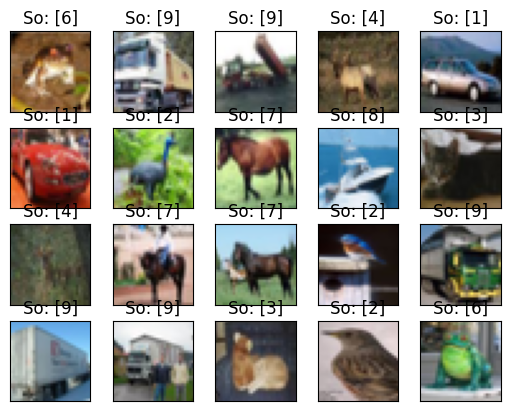

In [32]:
import matplotlib.pyplot as plt
from matplotlib.image import  imread
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i])
  plt.title("So: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [33]:
# Tạo mô hình
from keras import models
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape = (32*32*3,), name = "layer1"))
model.add(Dense(512, activation= 'relu', name = "layer2"))
model.add(Dense(10, activation = 'softmax', name = 'layerOut'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               1573376   
                                                                 
 layer2 (Dense)              (None, 512)               262656    
                                                                 
 layerOut (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [34]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

In [35]:
from keras.utils import to_categorical # one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
from tensorflow import keras
from keras import metrics
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs= 20, batch_size= 128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Hàm mất mát trong tệp kiểm tra (Test loss:)',test_loss)
print('Test accuracy :',test_acc)

Epoch 1/20
391/391 [==============================] - 16s 40ms/step - loss: 1.1929 - accuracy: 0.5799
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 1.1717 - accuracy: 0.5850
Epoch 3/20
391/391 [==============================] - 15s 37ms/step - loss: 1.1534 - accuracy: 0.5901
Epoch 4/20
391/391 [==============================] - 15s 38ms/step - loss: 1.1447 - accuracy: 0.5956
Epoch 5/20
391/391 [==============================] - 15s 38ms/step - loss: 1.1286 - accuracy: 0.6003
Epoch 6/20
391/391 [==============================] - 15s 38ms/step - loss: 1.1094 - accuracy: 0.6078
Epoch 7/20
391/391 [==============================] - 15s 39ms/step - loss: 1.1025 - accuracy: 0.6090
Epoch 8/20
391/391 [==============================] - 15s 38ms/step - loss: 1.0793 - accuracy: 0.6165
Epoch 9/20
391/391 [==============================] - 15s 38ms/step - loss: 1.0723 - accuracy: 0.6203
Epoch 10/20
391/391 [==============================] - 16s 40ms/step - loss: 1.060

1/1 [==============================] - 0s 100ms/step
horse


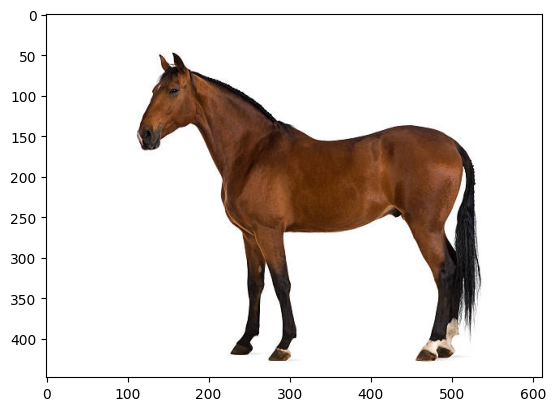

In [40]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np

url = 'horse.jpg'
img = load_img(url)
plt.imshow(img)
img = load_img(url, target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
a = int(np.argmax(model.predict(img), axis = -1))
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(class_name[a])